# 1. 데이터 셋 읽기(Quiz)

> iris 데이터를 읽어 들이고 data와 label을 dataframe으로 만드시오

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
import pandas as pd
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_labels = pd.DataFrame(iris.target)

df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


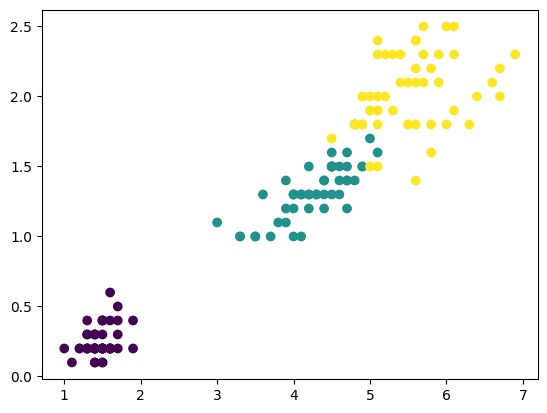

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df_data['petal length (cm)'], df_data['petal width (cm)'], c=df_labels)
plt.show()

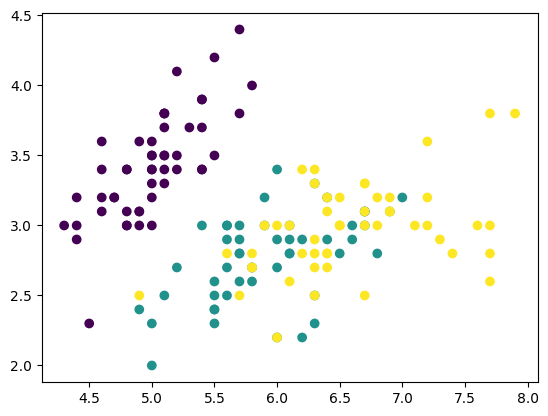

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df_data['sepal length (cm)'], df_data['sepal width (cm)'], c=df_labels)
plt.show()

# 2. 비선형 분류(Quiz)

> 학습데이터와 검증데이터를 나누고 모델을 SVM 모델을 만든 후 정확도를 산출하시오

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [7]:
import sklearn.svm as svm
from sklearn.metrics import accuracy_score

svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(X_train, np.ravel(y_train))
pred = svm_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9333333333333333

# 3. scaling

## 3.1 표준화(Quiz)

> 표준화를 이용하여 정확도를 산출하시오

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_stdScaled = scaler.fit_transform(iris.data)
df_stdScaled = pd.DataFrame(df_stdScaled, columns=iris.feature_names)
df_stdScaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [9]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(df_stdScaled, iris.target, test_size=0.3)
svm_clf.fit(X_train, np.ravel(y_train))
pred = svm_clf.predict(X_test)
accuracy_score(y_test, pred)

1.0

## 3.2 정규화(Quiz)

> 정규화를 이용하여 정확도를 산출하시오

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normScaled = scaler.fit_transform(iris.data)
df_normScaled = pd.DataFrame(df_normScaled, columns=iris.feature_names)
df_normScaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [11]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(df_normScaled, iris.target, test_size=0.3)
svm_clf.fit(X_train, np.ravel(y_train))
pred = svm_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9777777777777777

# 4. 교차검증(Quiz)

> scaling 결과 원본 데이터가 더 안정적이므로 원본 데이터를 이용한 교차 검증을 구해 보자.

In [12]:
from sklearn.model_selection import cross_val_score

svm_clf = svm.SVC(kernel='rbf')
print("no scaling : ", np.mean(cross_val_score(svm_clf, iris.data, iris.target, cv=10)))
print("normScaled : ", np.mean(cross_val_score(svm_clf, df_normScaled, iris.target, cv=10)))
print("stdScaled : ", np.mean(cross_val_score(svm_clf, df_stdScaled, iris.target, cv=10)))


no scaling :  0.9733333333333334
normScaled :  0.9600000000000002
stdScaled :  0.9666666666666666


# 5. 튜닝

In [13]:
from sklearn.model_selection import GridSearchCV

best_param = {}
def get_best_param(C_list, gamma_list):
    best_score = 0
    best_param = {}
    for c in C_list:
        for gamma in gamma_list:
            svm_clf = svm.SVC(kernel='rbf', C=c, gamma=gamma)
            score = np.mean(cross_val_score(svm_clf, df_normScaled, iris.target, cv=10))
            print("C : ", c, "gamma : ", gamma, "score : ", score)
            if score > best_score:
                best_score = score
                best_param = {'C': c, 'gamma': gamma}
    print("best_score : ", best_score)
    print("best_param - C : ", best_param['C'])
    print("best_param - gamma : ", best_param['gamma'])
    return best_param

In [14]:
C_list = [0.001, 0.1, 1, 10, 100]
gamma_list = [0.001, 0.01, 0.1, 1, 10]
best_param = get_best_param(C_list, gamma_list)

C :  0.001 gamma :  0.001 score :  0.9199999999999999
C :  0.001 gamma :  0.01 score :  0.9199999999999999
C :  0.001 gamma :  0.1 score :  0.9199999999999999
C :  0.001 gamma :  1 score :  0.9333333333333333
C :  0.001 gamma :  10 score :  0.9533333333333334
C :  0.1 gamma :  0.001 score :  0.9199999999999999
C :  0.1 gamma :  0.01 score :  0.9199999999999999
C :  0.1 gamma :  0.1 score :  0.9199999999999999
C :  0.1 gamma :  1 score :  0.9533333333333334
C :  0.1 gamma :  10 score :  0.96
C :  1 gamma :  0.001 score :  0.9199999999999999
C :  1 gamma :  0.01 score :  0.9199999999999999
C :  1 gamma :  0.1 score :  0.9533333333333334
C :  1 gamma :  1 score :  0.9666666666666668
C :  1 gamma :  10 score :  0.96
C :  10 gamma :  0.001 score :  0.9199999999999999
C :  10 gamma :  0.01 score :  0.9533333333333334
C :  10 gamma :  0.1 score :  0.9666666666666668
C :  10 gamma :  1 score :  0.9733333333333334
C :  10 gamma :  10 score :  0.9666666666666668
C :  100 gamma :  0.001 score :  

In [15]:
C_list_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
C_list_2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
gamma_list_1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma_list_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

best_param_1 = get_best_param(C_list_1, gamma_list_1)
best_param_2 = get_best_param(C_list_2, gamma_list_2)
best_param_3 = get_best_param(C_list_1, gamma_list_2)
best_param_4 = get_best_param(C_list_2, gamma_list_1)

C :  1 gamma :  0.1 score :  0.9533333333333334
C :  1 gamma :  0.2 score :  0.9533333333333334
C :  1 gamma :  0.3 score :  0.9666666666666666
C :  1 gamma :  0.4 score :  0.9666666666666666
C :  1 gamma :  0.5 score :  0.9666666666666666
C :  1 gamma :  0.6 score :  0.9666666666666666
C :  1 gamma :  0.7 score :  0.9666666666666666
C :  1 gamma :  0.8 score :  0.96
C :  1 gamma :  0.9 score :  0.9666666666666668
C :  1 gamma :  1 score :  0.9666666666666668
C :  2 gamma :  0.1 score :  0.9533333333333334
C :  2 gamma :  0.2 score :  0.9666666666666666
C :  2 gamma :  0.3 score :  0.9666666666666666
C :  2 gamma :  0.4 score :  0.9666666666666668
C :  2 gamma :  0.5 score :  0.9666666666666668
C :  2 gamma :  0.6 score :  0.9733333333333334
C :  2 gamma :  0.7 score :  0.9666666666666668
C :  2 gamma :  0.8 score :  0.9733333333333334
C :  2 gamma :  0.9 score :  0.9733333333333334
C :  2 gamma :  1 score :  0.9733333333333334
C :  3 gamma :  0.1 score :  0.9666666666666666
C :  3 gam

In [16]:
# best_score :  0.9800000000000001
# best_param - C :  3
# best_param - gamma :  0.3

C_list = [2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0]
gamma_list = [0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.40]
get_best_param(C_list, gamma_list)

C :  2.1 gamma :  0.21 score :  0.9666666666666666
C :  2.1 gamma :  0.22 score :  0.9666666666666666
C :  2.1 gamma :  0.23 score :  0.9666666666666666
C :  2.1 gamma :  0.24 score :  0.9666666666666666
C :  2.1 gamma :  0.25 score :  0.9666666666666666
C :  2.1 gamma :  0.26 score :  0.9666666666666666
C :  2.1 gamma :  0.27 score :  0.9666666666666666
C :  2.1 gamma :  0.28 score :  0.9666666666666666
C :  2.1 gamma :  0.29 score :  0.9666666666666666
C :  2.1 gamma :  0.3 score :  0.9666666666666666
C :  2.1 gamma :  0.31 score :  0.9666666666666666
C :  2.1 gamma :  0.32 score :  0.9666666666666666
C :  2.1 gamma :  0.33 score :  0.96
C :  2.1 gamma :  0.34 score :  0.96
C :  2.1 gamma :  0.35 score :  0.96
C :  2.1 gamma :  0.36 score :  0.9666666666666668
C :  2.1 gamma :  0.37 score :  0.9666666666666668
C :  2.1 gamma :  0.38 score :  0.9666666666666668
C :  2.1 gamma :  0.39 score :  0.9666666666666668
C :  2.1 gamma :  0.4 score :  0.9666666666666668
C :  2.2 gamma :  0.21 s

{'C': 2.3, 'gamma': 0.39}

# 6. 최적의 파라미터 적용

In [17]:
svm_clf = svm.SVC(kernel='rbf', C=3, gamma=0.3)
result = svm_clf.fit(X_train, np.ravel(y_train))
pred = svm_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9777777777777777

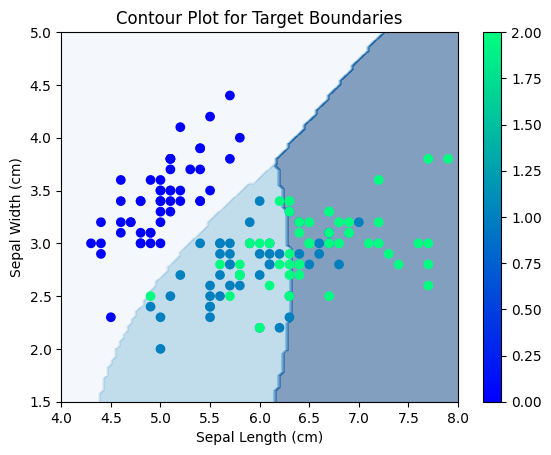

In [18]:
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.3)
svm_clf = svm.SVC(kernel='rbf', C=3, gamma=0.3)
result = svm_clf.fit(X_train, np.ravel(y_train))
pred = svm_clf.predict(X_test)
accuracy_score(y_test, pred)

import numpy as np

import matplotlib.pyplot as plt

# Generate grid points
x = np.linspace(4, 8, 100)
y = np.linspace(1.5, 5, 100)
X, Y = np.meshgrid(x, y)

# Predict the target labels for each grid point
Z = svm_clf.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

# Plot the contour plot
plt.contourf(X, Y, Z, alpha=0.5, cmap='Blues')
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='winter')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Contour Plot for Target Boundaries')
plt.colorbar()
plt.show()


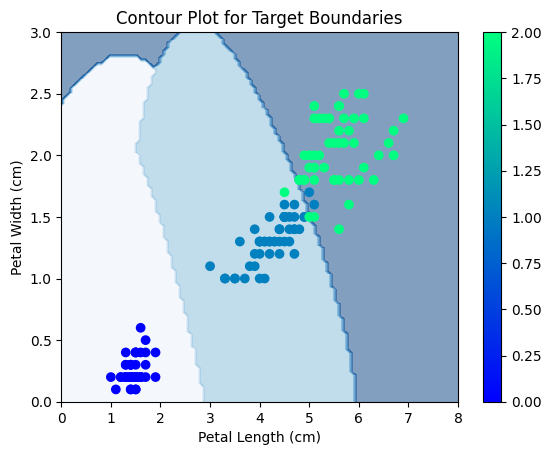

In [29]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2,3]], iris.target, test_size=0.3)
svm_clf = svm.SVC(kernel='rbf', C=3, gamma=0.3)
result = svm_clf.fit(X_train, np.ravel(y_train))
pred = svm_clf.predict(X_test)
accuracy_score(y_test, pred)

import numpy as np

import matplotlib.pyplot as plt

# Generate grid points
x = np.linspace(0, 8, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)

# Predict the target labels for each grid point
Z = svm_clf.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

# Plot the contour plot
plt.contourf(X, Y, Z, alpha=0.5, cmap='Blues')
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, cmap='winter')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Contour Plot for Target Boundaries')
plt.colorbar()
plt.show()
